In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import  LinearRegression, Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [69]:
df=pd.read_csv("../data/ObesityDataSet_raw_and_data_sinthetic.csv")

## **FEATURE ENGINEERING**

In [70]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


- FAVC : Feature, Binary, " Do you eat high caloric food frequently? "
- FCVC : Feature, Integer, " Do you usually eat vegetables in your meals? "
- NCP : Feature, Continuous, " How many main meals do you have daily? "
- CAEC : Feature, Categorical, " Do you eat any food between meals? "
- SMOKE : Feature, Binary, " Do you smoke? "
- CH2O: Feature, Continuous, " How much water do you drink daily? "
- SCC: Feature, Binary, " Do you monitor the calories you eat daily? "
- FAF: Feature, Continuous, " How often do you have physical activity? "
- TUE : Feature, Integer, " How much time do you use technological devices such as cell phone, videogames, television, computer and others? "
- CALC : Feature, Categorical, " How often do you drink alcohol? "
- MTRANS : Feature, Categorical, " Which transportation do you usually use? "

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

Transformamos las variables object en numéricas

In [72]:
df["Male"] = df["Gender"].map({"Male": 1, "Female": 0})
df=df.drop(columns="Gender")

In [73]:
df["BMI"]=df["Weight"]/(df["Height"])**2

In [74]:
df["family_with_overweight"]=df["family_history_with_overweight"].map({"yes":1,"no":0})
df=df.drop(columns="family_history_with_overweight")

In [75]:
df["Alcohol"]=df["CALC"].map({'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3})
df=df.drop(columns="CALC")

In [76]:
#nos centramos en si se ejercita de alguna forma o depende de un medio de transporte
df["Andar_bici"]=df["MTRANS"].map({'Public_Transportation':0,'Automobile':0, 'Motorbike':0,'Walking':1,'Bike':1})
df=df.drop(columns="MTRANS")

In [77]:
#Nos vamos a centrar en si la persona pica o no entre horas, independientemente de la frecuencia, ya que no sabemos la cantidad que es lo realmente importante
df["Picoteo"]=df["CAEC"].map({'Sometimes':1, 'Frequently':1, 'Always':1, 'no':0})
df=df.drop(columns="CAEC")

In [78]:
df["Fumador"]=df["SMOKE"].map({'no':0,"yes":1})
df=df.drop(columns="SMOKE")

In [79]:
df["Control_kcal"]=df["SCC"].map({'no':0,"yes":1})
df=df.drop(columns="SCC")

In [80]:
df["FastFood"]=df["FAVC"].map({'no':0,"yes":1})
df=df.drop(columns="FAVC")

In [81]:
df["Age"]=df["Age"].astype(int)

## **ANÁLISIS** 

<Axes: >

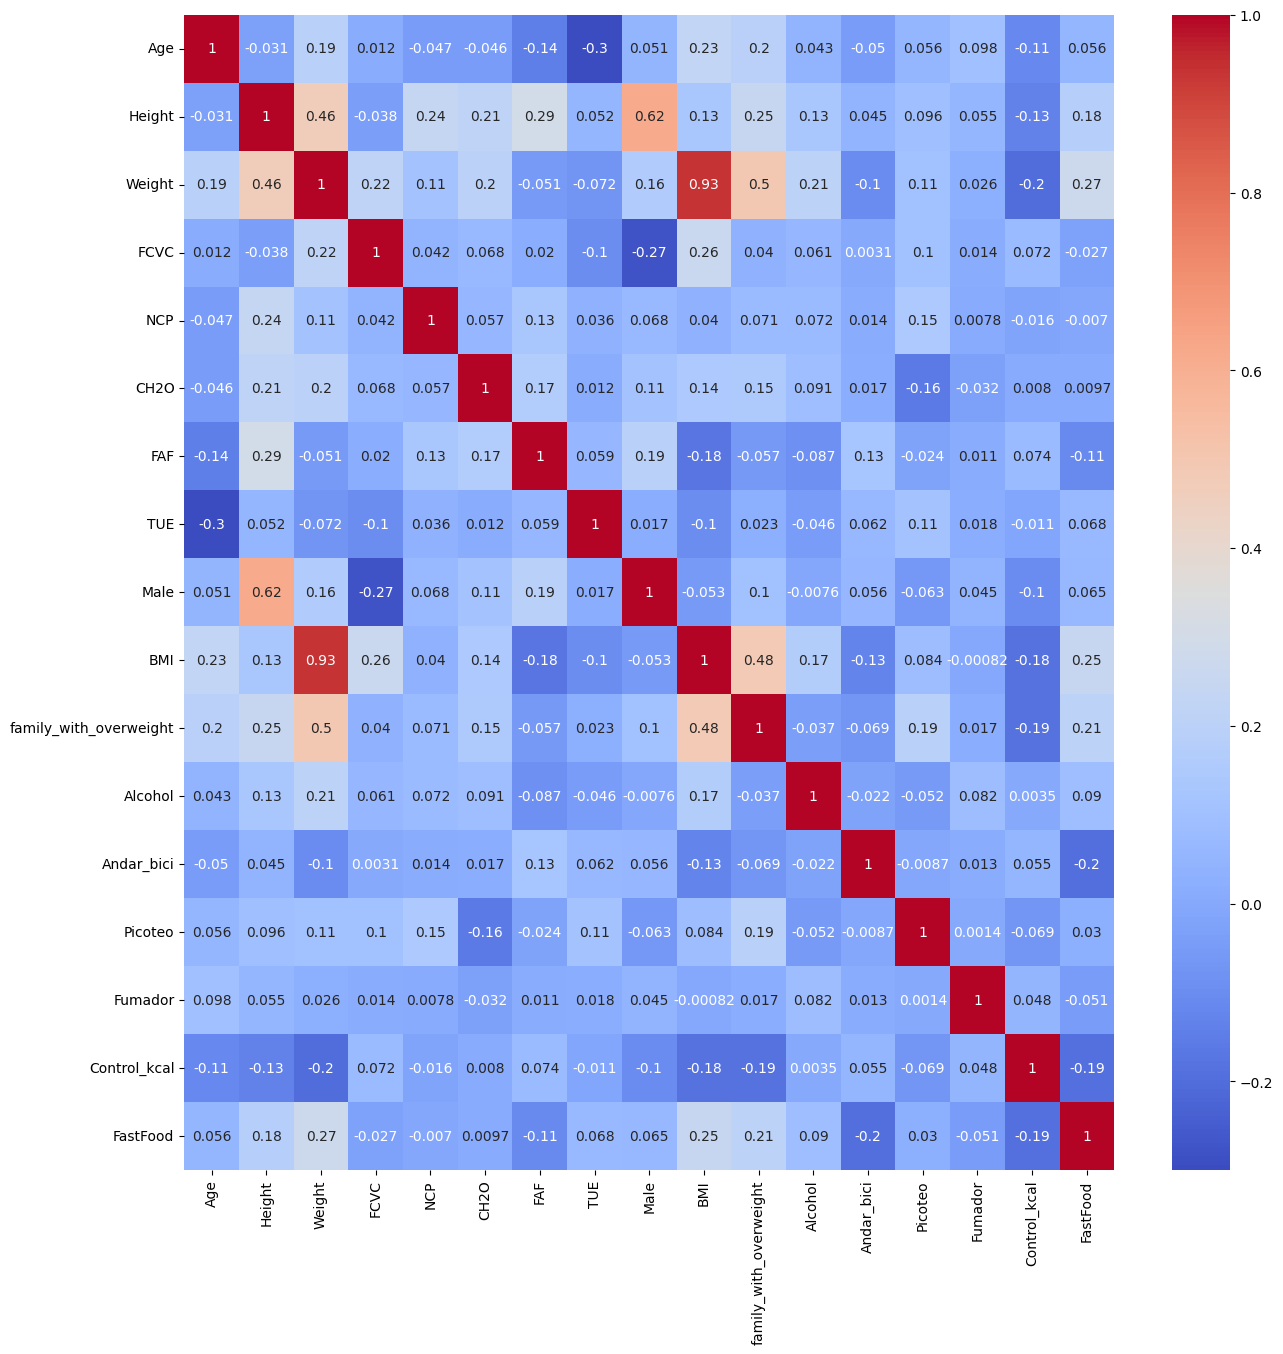

In [82]:
plt.figure(figsize=(15,15))
sns.heatmap((df.drop(columns="NObeyesdad")).corr(),annot=True,cmap="coolwarm")

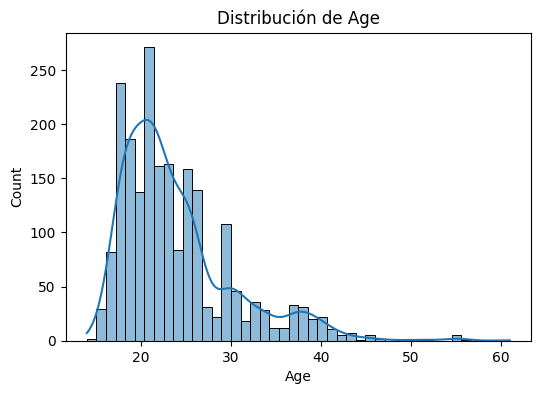

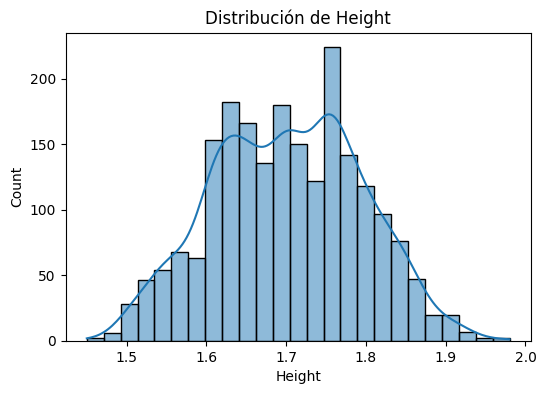

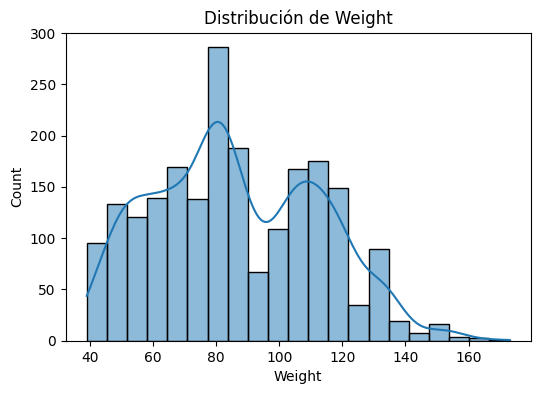

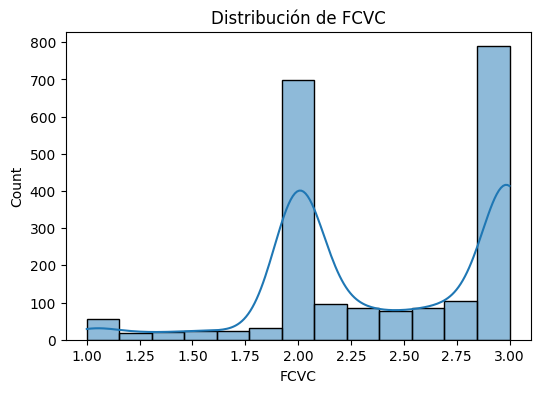

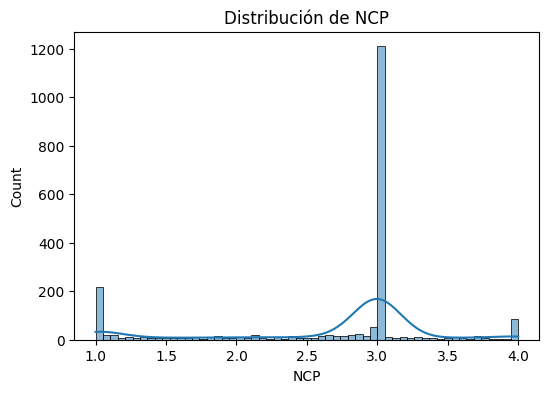

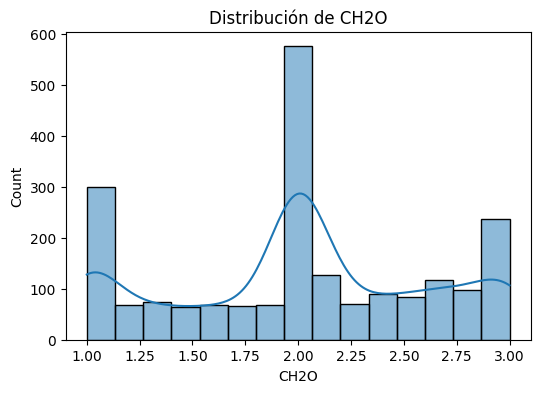

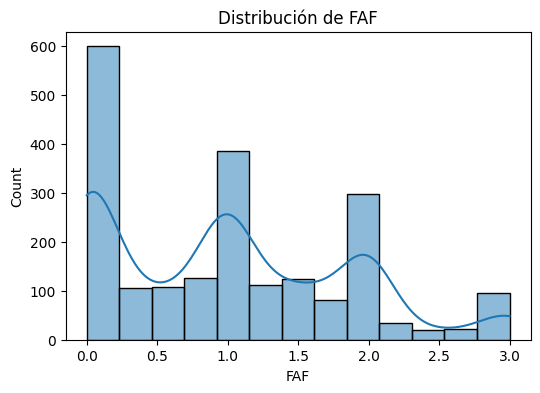

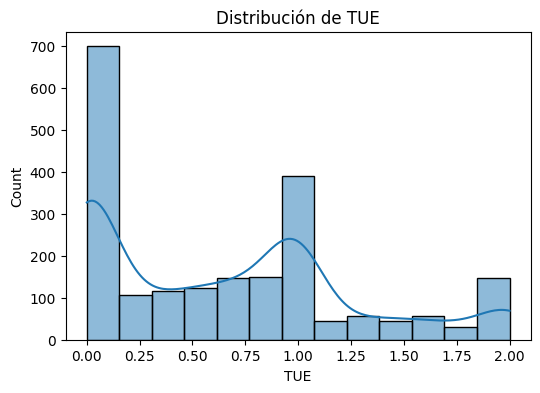

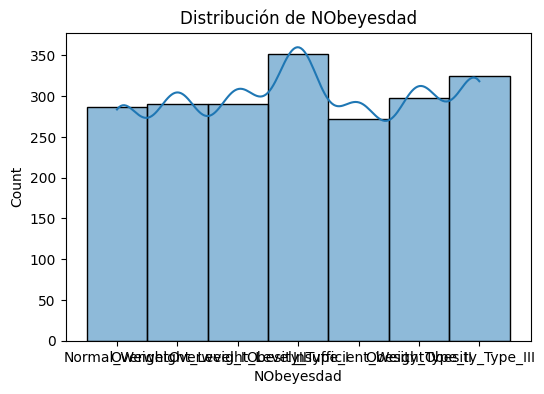

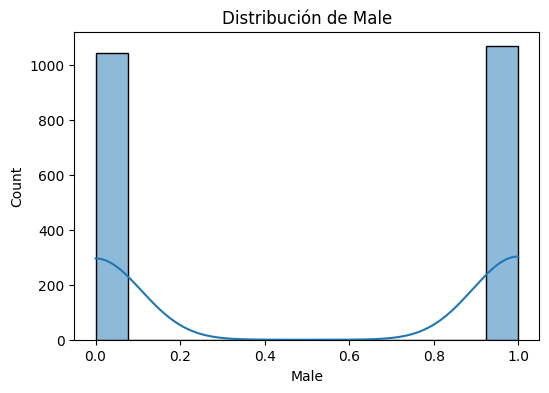

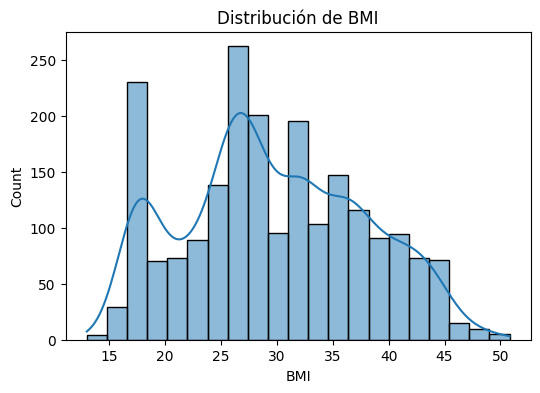

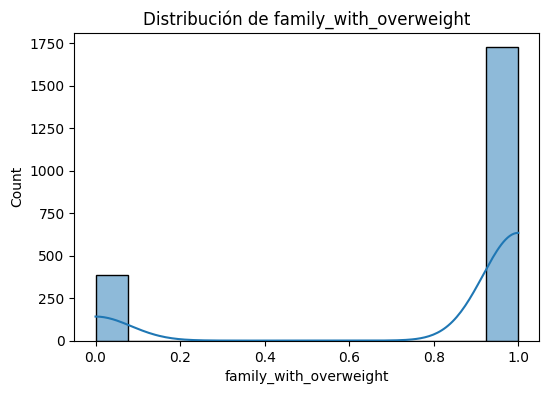

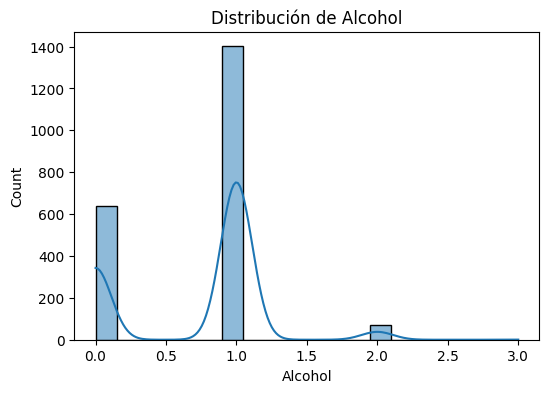

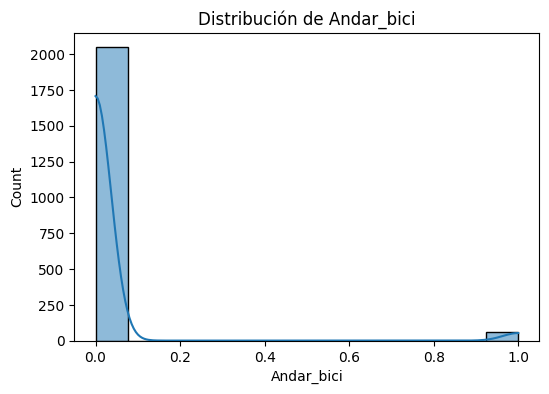

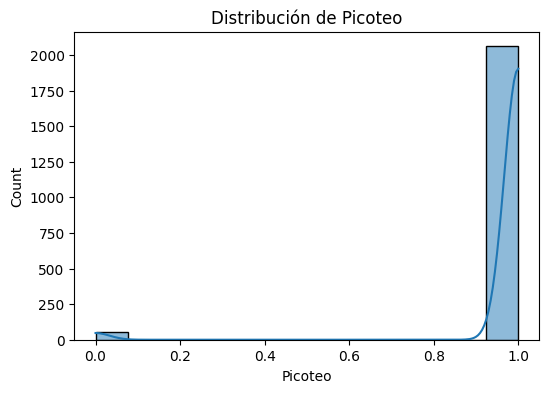

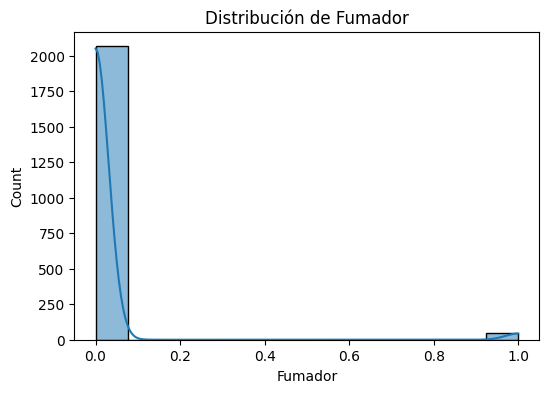

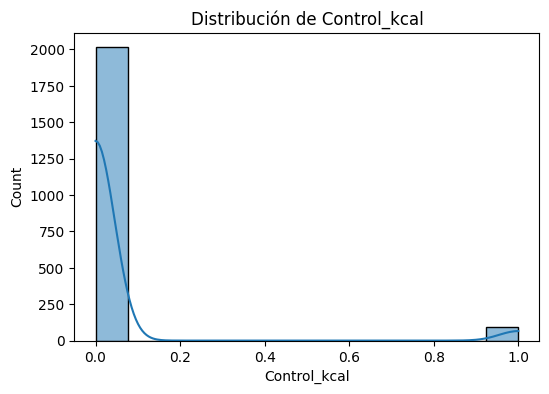

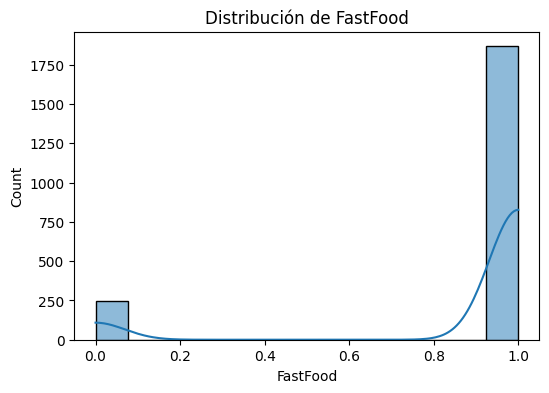

In [83]:
for col in df.columns:
    plt.figure(figsize=(6, 4)) 
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribución de {col}")
    plt.show()

- Las edades se concentran entorno a los 15-30 años aunqu etenemos un rango de 10-60.
- Las alturas notenemos muchos datos alejados d elo que seria un rango medio(1.7 a 1.8)
- Los pesos son muy variados detacando los 80 kg
- El número de comidas diarias suele ser 3, lo que nos puede servir para futuras predicciones o recomendaciones
- Las categorias de peso está muy igualada
- EL numero de hombres y mujeres es similar, lo que es importante ya que por constitución los hombres sueles tender a pesar más al igual que el metabolismo o el porcentaje graso es muy diferente
- En la distribución de IBM tenemos un rango muy amplio aunque destaca el correspondiente a infrapeso y sobrepeso
- Hay más datos donde si que existen antecedentes famiales de obesidad
- En alcohol la mayoria de datos son de una frecuencia de a veces
- La mayoría se despaza en algún transporte para ir al trabajo o a la escuela
- La mayoria de los registros indican que no son fumadores y que si picotean durante el dia, así como que no contolan las kcal ingeridas y si consumen comida rápida.
Estas distribuciones ya nos dan un indicio de los datos que pueden sernos más relevantes

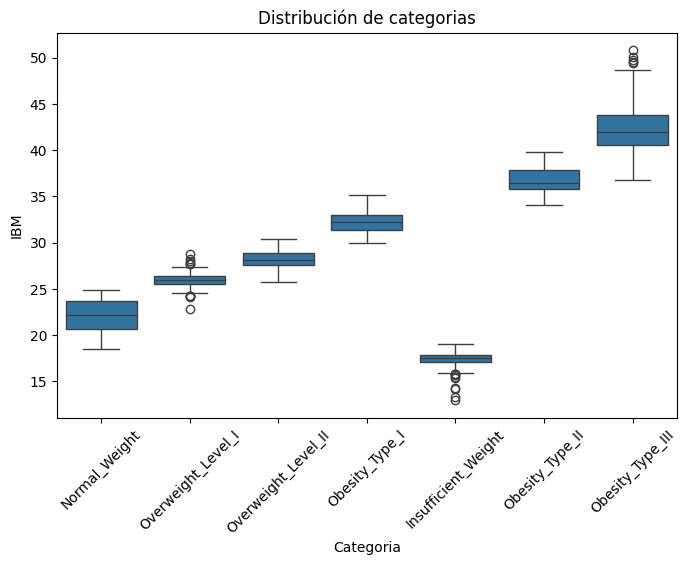

In [84]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="NObeyesdad", y="BMI")
plt.title("Distribución de categorias")
plt.xlabel("Categoria")
plt.ylabel("IBM")
plt.xticks(rotation=45)
plt.show()

Para la clasificación se tiene un 5% de rango en el IBM. Esos outlier pueden deberse a casos que estén con un porcetaje en la frontera y no tan central

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Normal_Weight'),
  Text(1, 0, 'Overweight_Level_I'),
  Text(2, 0, 'Overweight_Level_II'),
  Text(3, 0, 'Obesity_Type_I'),
  Text(4, 0, 'Insufficient_Weight'),
  Text(5, 0, 'Obesity_Type_II'),
  Text(6, 0, 'Obesity_Type_III')])

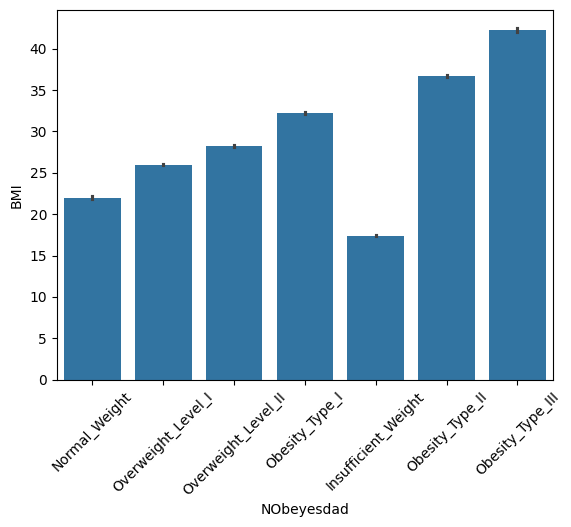

In [85]:
sns.barplot(x=df["NObeyesdad"],y=df["BMI"])

plt.xticks(rotation=45)

In [86]:
df["NObeyesdad"]=df["NObeyesdad"].map({'Normal_Weight':3,"Overweight_Level_I":2,"Overweight_Level_II":1,"Insufficient_Weight":0,"Obesity_Type_I":4,"Obesity_Type_II":5,"Obesity_Type_III":6})

<Axes: >

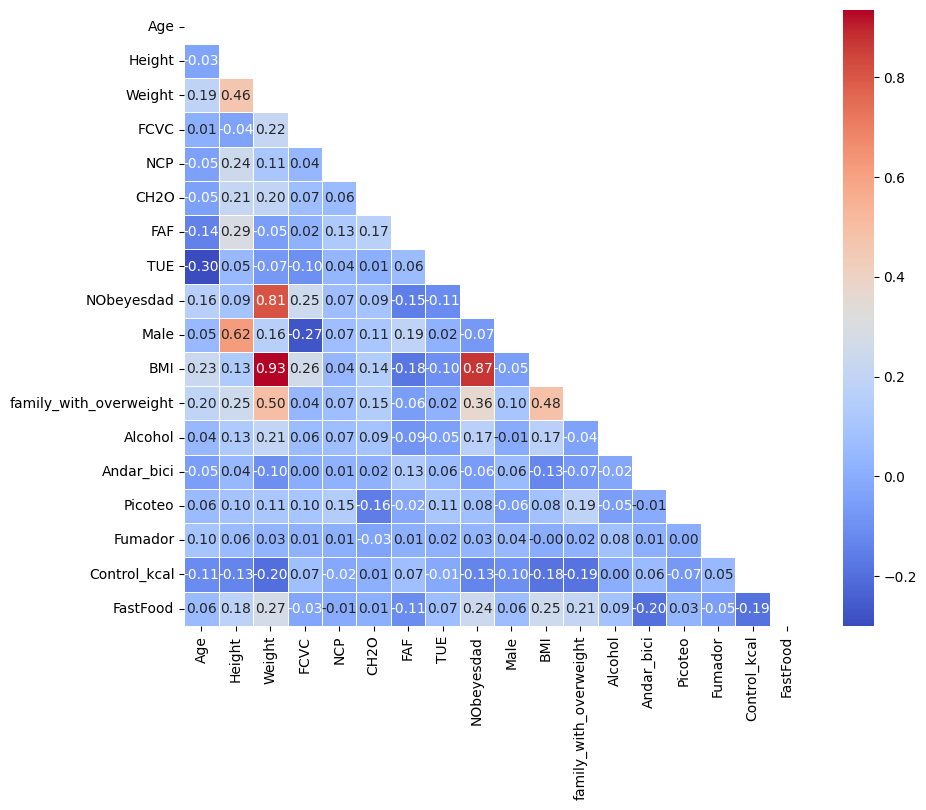

In [87]:
# Crear la máscara para ocultar la mitad superior
mask = np.triu(np.ones_like(df.corr()))

# Configurar el gráfico
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), mask=mask, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)


## **MODELOS**

In [20]:
X=df[['Age', 'Height', 'Weight', 'family_with_overweight', 'Alcohol','Andar_bici','Control_kcal', 'FastFood',"Male"]]
y= df["NObeyesdad"]
#Para poder hacer la clasificación debemos tomar como target el BMI ya que es el rango
# que usamos para categorizar. De esta forma podremos predecir de un modo mucho mas preciso

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("R2 score", model.score(X_test, y_test))
    print("R2 score train", model.score(X_train, y_train))
    print("MAE", mean_absolute_error(y_test, y_pred))
    print("MSE", mean_squared_error(y_test, y_pred))
    print("RMSE", mean_squared_error(y_test, y_pred) ** (1/2))
    sns.displot(y_pred - y_test)
    return model

In [23]:
scaler = StandardScaler()

X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

R2 score 0.7646761574780916
R2 score train 0.7623259237081511
MAE 0.7386250500037181
MSE 0.9061195657625046
RMSE 0.9519031283499937


LinearRegression()

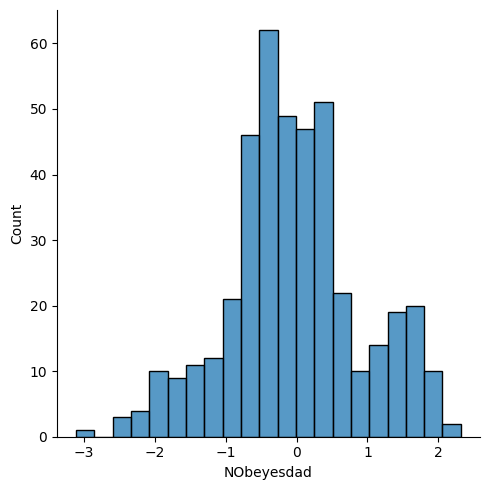

In [24]:
model_1 = train_evaluate_model(LinearRegression(), X_train_scal, y_train, X_test_scal, y_test)
model_1

R2 score 0.7646761574780938
R2 score train 0.7623259237081511
MAE 0.7386250500037291
MSE 0.9061195657624963
RMSE 0.9519031283499894


LinearRegression()

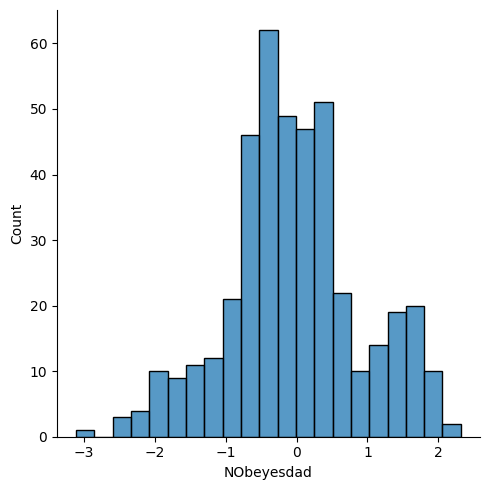

In [25]:
model_2 = train_evaluate_model(LinearRegression(), X_train, y_train, X_test, y_test)
model_2

R2 score 0.7636231123308195
R2 score train 0.7589020594809709
MAE 0.7595449730587571
MSE 0.9101743389692857
RMSE 0.9540305754897406


Ridge(alpha=2)

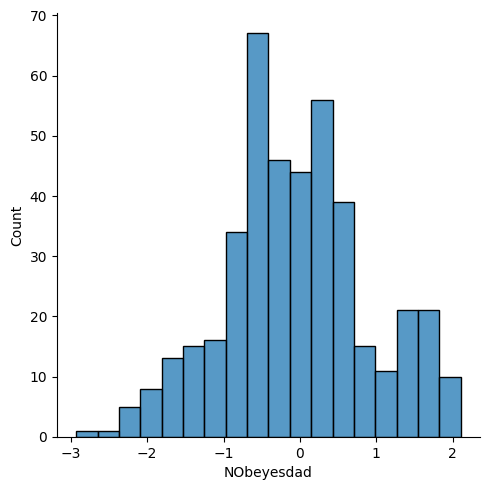

In [26]:
model_3 = train_evaluate_model(Ridge(alpha=2), X_train, y_train, X_test, y_test)
model_3

R2 score 0.813167223601864
R2 score train 0.8186212653740514
MAE 0.631264762066828
MSE 0.7194036626540348
RMSE 0.8481766694822693


LinearRegression()

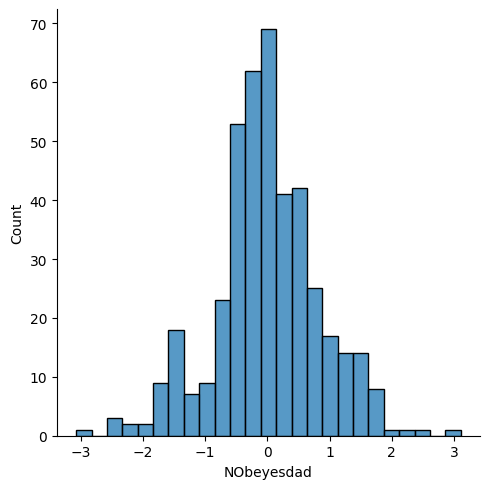

In [27]:
pol_2 = PolynomialFeatures(degree=2)

X_train_pol2 = pol_2.fit_transform(X_train)
X_test_pol2 = pol_2.transform(X_test)

model_4 = train_evaluate_model(LinearRegression(), X_train_pol2, y_train, X_test_pol2, y_test)
model_4

In [28]:
# Guardar el transformador PolynomialFeatures
with open("../modelos/pol2_transform_ob_cop.pkl", "wb") as pol_transf_ob_cop:
    pickle.dump(pol_2, pol_transf_ob_cop)

In [29]:
with open("../modelos/pol2_ob_cop.pkl", "wb") as model_pol2_ob_cop:
    pickle.dump(model_4, model_pol2_ob_cop)

R2 score 0.9889802790259
R2 score train 0.9392403550214382
MAE 0.11951025117370825
MSE 0.0424316749075087
RMSE 0.20598950193519258


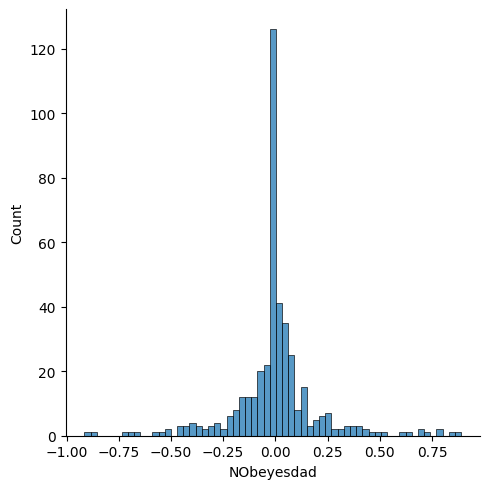

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

rnd_reg = RandomForestRegressor(n_estimators=200,
                                 max_leaf_nodes=32,
                                 random_state=42)
rnd_reg.fit(X_test, y_test)

y_pred_reg = rnd_reg.predict(X_test)
print("R2 score", rnd_reg.score(X_test, y_test))
print("R2 score train",rnd_reg.score(X_train, y_train))
print("MAE", mean_absolute_error(y_test, y_pred_reg))
print("MSE", mean_squared_error(y_test, y_pred_reg))
print("RMSE", mean_squared_error(y_test, y_pred_reg) ** (1/2))
sns.displot(y_pred_reg - y_test)

In [31]:
with open("../modelos/rnd_ob_cop.pkl", "wb") as model_rnd_ob_cop:
    pickle.dump(rnd_reg, model_rnd_ob_cop)

Tenemos que tener en cuenta que el rengo entre una categoria y otra es de un 5%, por tanto el que parece mejor modelo es el polinomico, que nos da un Mae de 0.047%

### **MODELO REDES NEURONALES**

In [32]:
from tensorflow.keras.optimizers import RMSprop
from keras.utils import get_file
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [33]:
model_rn = keras.models.Sequential([
    keras.layers.Dense(64, activation = 'relu',
                      input_shape = X_train_scal.shape[1:]),# se esta definiendo la primera capa oculta(se autodefine),
                       # ya que no tiene funcion de activacion
    keras.layers.Dense(16),
    keras.layers.Dense(1)
])

model_rn.compile(loss = "mse",#funcion de perdida
             optimizer=tf.keras.optimizers.RMSprop(0.001),
             metrics=['mae'])



c:\Users\UX490U\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model_rn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,697 (6.63 KB)

 Trainable params: 1,697 (6.63 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
early_stopping = keras.callbacks.EarlyStopping(patience=5)

In [36]:
history = model_rn.fit(X_train_scal,
                   y_train,
                   batch_size=32,
                   epochs = 100,
                   validation_split=0.2,
                   callbacks=[early_stopping])# como ya hemos sacado el validation se lo pasamos

Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 7.7767 - mae: 2.3337 - val_loss: 2.3536 - val_mae: 1.3510
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7918 - mae: 1.1562 - val_loss: 1.0915 - val_mae: 0.8421
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0433 - mae: 0.8295 - val_loss: 0.8820 - val_mae: 0.7204
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.9044 - mae: 0.7550 - val_loss: 0.8270 - val_mae: 0.7029
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8162 - mae: 0.6982 - val_loss: 0.7829 - val_mae: 0.6637
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7930 - mae: 0.6823 - val_loss: 0.7273 - val_mae: 0.6358
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7321 - mae: 0.6516 - val_loss: 0.7422 - val_mae: 0.6771
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7174 - mae: 0.6459 - val_loss: 0.6769 - val_mae: 0.6282
Epoch 9/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.6

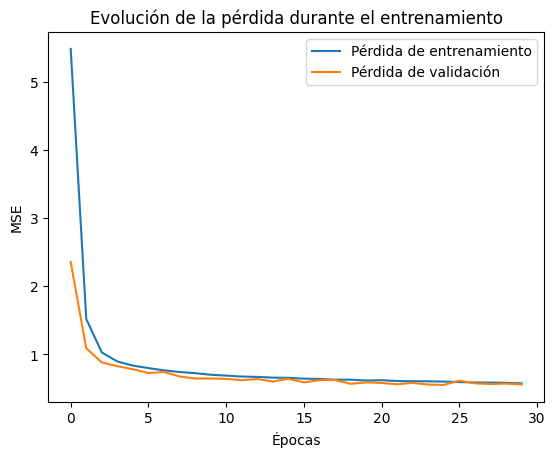

In [ ]:
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()
plt.title('Evolución de la pérdida durante el entrenamiento')
plt.show()

In [38]:
y_pred=model_rn.predict(X_test_scal[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


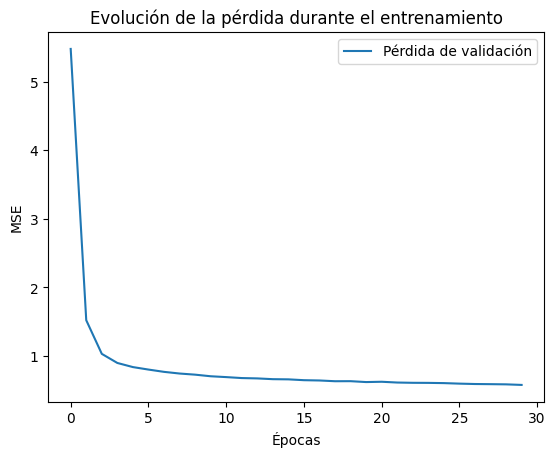

In [39]:
plt.plot(history.history['loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()
plt.title('Evolución de la pérdida durante el entrenamiento')
plt.show()

In [40]:
model_rn.compile(loss="mse", optimizer=RMSprop(learning_rate=0.001), metrics=["mae", "mse"])

loss,mae, mse = model_rn.evaluate(X_test_scal, y_test, verbose=1)

print(f"Pérdida (Loss - MSE): {loss:.4f}")
print(f"Error absoluto medio (MAE): {mae:.4f}")
print(f"Error cuadrático medio (MSE): {mse:.4f}")


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6198 - mae: 0.5754 - mse: 0.6198  
Pérdida (Loss - MSE): 0.6037
Error absoluto medio (MAE): 0.5661
Error cuadrático medio (MSE): 0.6037


In [41]:
model_rn.save("../modelos/model_keras_ob_cop.h5")

---------------------------

Evaluamos los modelos

In [42]:
y_pred_rn = (model_rn.predict(X_test_scal)).flatten()#Lo pasamos a 1_dim



14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [66]:
df_resultados_rn = pd.DataFrame({"Type": np.round(y_pred_rn).astype(int),"Type real":y_test})

In [67]:
df_resultados_rn[3:15]

,Type,Type real
527,1,0
196,2,3
744,0,0
1635,5,5
324,2,2
1449,4,4
634,0,0
1442,3,4
1972,6,6
1673,5,5


In [45]:
X_ejer_pol2 = pol_2.transform(X_test)
y_pred_ejer_pol2 = np.round(model_4.predict(X_ejer_pol2))

In [58]:
df_resultados_pol2 = pd.DataFrame({"Type": np.round(y_pred_ejer_pol2).astype(int),"Type real":y_test})

In [63]:
df_resultados_pol2[3:15]

,Type,Type real
527,1,0
196,2,3
744,0,0
1635,5,5
324,2,2
1449,4,4
634,0,0
1442,3,4
1972,6,6
1673,4,5


In [56]:
df_resultados_rnd = pd.DataFrame({"Type": np.round(y_pred_reg).astype(int),"Type real":y_test})

In [64]:
df_resultados_rnd[3:15]

,Type,Type real
527,0,0
196,3,3
744,0,0
1635,5,5
324,2,2
1449,4,4
634,0,0
1442,4,4
1972,6,6
1673,5,5


**Evaluamos que modelo de los escogidos nos da mejores resultados en test**

In [ ]:
from sklearn.metrics import r2_score
mae = mean_absolute_error(df_resultados_rn["Type real"], df_resultados_rn["Type"])
mse = mean_squared_error(df_resultados_rn["Type real"], df_resultados_rn["Type"])
rmse = np.sqrt(mse)
r2 = r2_score(df_resultados_rn["Type real"],df_resultados_rn["Type"])

# Mostrar resultados
print(f"MAE_rn: {mae:.2f} ")
print(f"RMSE_rn: {rmse:.2f} ")
print(f"R² Score_rn: {r2:.2f}")

MAE_rn: 0.57 kcal
RMSE_rn: 0.78 kcal
R² Score_rn: 0.84


In [ ]:
mae = mean_absolute_error(df_resultados_pol2["Type real"], df_resultados_pol2["Type"])
mse = mean_squared_error(df_resultados_pol2["Type real"], df_resultados_pol2["Type"])
rmse = np.sqrt(mse)
r2 = r2_score(df_resultados_pol2["Type real"],df_resultados_pol2["Type"])

# Mostrar resultados
print(f"MAE_pol2: {mae:.2f} ")
print(f"RMSE_pol2: {rmse:.2f} ")
print(f"R² Score_pol2: {r2:.2f}")

MAE_pol2: 0.58 kcal
RMSE_pol2: 0.90 kcal
R² Score_pol2: 0.79


In [ ]:
mae = mean_absolute_error(df_resultados_rnd["Type real"], df_resultados_rnd["Type"])
mse = mean_squared_error(df_resultados_rnd["Type real"], df_resultados_rnd["Type"])
rmse = np.sqrt(mse)
r2 = r2_score(df_resultados_rnd["Type real"],df_resultados_rnd["Type"])

# Mostrar resultados
print(f"MAE_rnd: {mae:.2f} kcal")
print(f"RMSE_rnd: {rmse:.2f} kcal")
print(f"R² Score_rnd: {r2:.2f}")

MAE_rnd: 0.12 kcal
RMSE_rnd: 0.21 kcal
R² Score_rnd: 0.99


    De todos los modelos estudiados vemos que el que mejor resultados nos da es el RadomForest

--------------------------------

----------------------------------